<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [23]:
hh_data = pd.read_csv('data\dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [24]:
hh_data.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [25]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [26]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [27]:
# Задаем функцию определения категории образования соискателя.
def ed_cat_choose(col):
    ed_categories = ['Неоконченное высшее','Высшее','Среднее специальное','Среднее']
    # Оставляем в строке значения признака первые два слова.
    col = ' '.join(col.split(' ')[:2])
    # Удаляем лишние слова для двух категорий.
    if col == 'Высшее образование':
        col = 'Высшее'
    if col == 'Среднее образование':
        col = 'Среднее'
    return col
  
# Создаем новый категоральный признак уровня образования соискателя.
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(ed_cat_choose).astype('category')

# Удаляем старый признак образования соискателя.
hh_data.drop('Образование и ВУЗ', axis=1, inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [28]:
# Задаем два новых самостоятельных признака пола и возраста.
hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x.split(' , ')[0][0])
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: int(x.split(' , ')[1].split()[0]))

# Удаляем признак 'Пол, возраст'.
hh_data.drop('Пол, возраст', axis=1, inplace=True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [29]:
# Задаем функцию для расчета суммарного опыта соискателя в месяцах.
def workexpcount(col):
    # Возвращаем пустое значение, если в столбце не строка.
    if type(col) is not str:
        return None
    else:
        # Вводим переменные со списками слов, относящихся к сроку опыта, а также список месяцев (с них начинается конкретизация опыта).
        year_words = ['год', 'года', 'лет']
        month_words = ['месяцев', 'месяц', 'месяца']
        # Переменная-счетчик опыта
        total_exp = 0
        find_list = col.split()[:6]
        # Через цикл по индексу списка ловим показатели опыта и проводим подсчет.
        for i in range(len(find_list)):
            if find_list[i] in year_words:
                total_exp += int(find_list[i-1]) * 12
            if find_list[i] in month_words:
                total_exp += int(find_list[i-1])
        return None if total_exp == 0 else total_exp


# Создаем новый признак опыта работы в месяцах.
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(workexpcount)

# Удаляем признак 'Опыт работы'.
hh_data.drop('Опыт работы', axis=1, inplace=True)
    

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [30]:
# Задаем функцию для определения городасоискателя по 4 категориям.
def city_add(col):
    # Список городов-миллионников.
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' 
                     ]
    # Задаем условия определения города в первом сегменте списка col.
    city = col.split(' , ')[0]
    if city in million_cities:
        return 'город-миллионник'
    elif city == 'Москва':
        return city
    elif city == 'Санкт-Петербург':
        return city
    else:
        return 'другие'
    

# Задаем функцию определения готовности соискателя к перезду.
def move_add(col):
    # Задаем условия наличия/утери информации о командировках в данных для определения необходимого сегмента col.
    if 'командировкам' not in col.split(' , ')[-1]:
        move_condition = col.split(' , ')[-1]
    else:
        move_condition = col.split(' , ')[-2]
    # Задаем условия определения готовности к перезду.
    if 'не готов' in move_condition or 'не хочу' in move_condition:
        return False
    else:
        return True
    

# Задаем функцию определения готовности соискателя к командировкам.
def businestrip_add(col):
    # Задаем условия наличия/утери информации о командировках в данных для определения необходимого сегмента col.
    if 'командировкам' not in col.split(' , ')[-1]:
        return False
    else:
        bt_condition = col.split(' , ')[-1]
        # Задаем условия определения готовности к командировкам.
        if 'не готов' in bt_condition:
            return False
        else:
            return True
        

# Создаем новые признаки 'Город', 'Готовность к переезду' и 'Готовность к командировкам'.  
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(city_add).astype('category')
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(move_add)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(businestrip_add)

# Удаляем признак 'Город, переезд, командировки'.
hh_data.drop('Город, переезд, командировки', axis=1, inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [31]:
# Задаем новые признаки-"мигалки" из признака "Занятость".
hh_data['полная занятость'] = hh_data['Занятость'].apply(lambda x: True if 'полная занятость' in x.split(', ') else False)
hh_data['частичная занятость'] = hh_data['Занятость'].apply(lambda x: True if 'частичная занятость' in x.split(', ') else False)
hh_data['проектная работа'] = hh_data['Занятость'].apply(lambda x: True if 'проектная работа' in x.split(', ') else False)
hh_data['стажировка'] = hh_data['Занятость'].apply(lambda x: True if 'стажировка' in x.split(', ') else False)
hh_data['волонтерство'] = hh_data['Занятость'].apply(lambda x: True if 'волонтерство' in x.split(', ') else False)

# Задаем новые признаки-"мигалки" из признака "График".
hh_data['полный день'] = hh_data['График'].apply(lambda x: True if 'полный день' in x.split(', ') else False)
hh_data['сменный график'] = hh_data['График'].apply(lambda x: True if 'сменный график' in x.split(', ') else False)
hh_data['гибкий график'] = hh_data['График'].apply(lambda x: True if 'гибкий график' in x.split(', ') else False)
hh_data['удаленная работа'] = hh_data['График'].apply(lambda x: True if 'удаленная работа' in x.split(', ') else False)
hh_data['вахтовый метод'] = hh_data['График'].apply(lambda x: True if 'вахтовый метод' in x.split(', ') else False)

# Удаляем старые признаки "График" и "Занятость".
hh_data.drop(['Занятость', 'График'], axis=1, inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
# Задаем функцию подсчета суммы ЗП.
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary


# Задаем функцию для форматирования валют в столбце ЗП под стандарт ISO.
def get_salary_currency(arg):
    currency_dict = {
        'грн': 'UAH', 'USD': 'USD', 
        'EUR': 'EUR','белруб': 'BYN',
        'KGS': 'KGS', 'сум': 'UZS',
        'AZN': 'AZN', 'KZT': 'KZT'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]
    

# Подгружаем таблицу с курсом валют.
rates = pd.read_csv('data\ExchangeRates.csv')
# Форматируем соответствующие столбцы с датами в обеих таблицах под формат dt.
rates['date'] = pd.to_datetime(rates['date']).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме']).dt.date
# Создаем новые промежуточные признаки из признака ЗП.
hh_data['Размер ЗП'] = hh_data['ЗП'].apply(get_salary_num)
hh_data['Валюта ISO'] = hh_data['ЗП'].apply(get_salary_currency)
# Производим объединение таблиц по признакам даты и валюты.
merged_hh_data = hh_data.merge(
    rates, 
    left_on=['Валюта ISO', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
    )
# Заполняем необходимые пропуски в признаках к валюте рубля для последующего использования в вычислениях.
merged_hh_data['close'] = merged_hh_data['close'].fillna(1)
merged_hh_data['proportion'] = merged_hh_data['proportion'].fillna(1)
# Создаем новый признак 'ЗП (руб)'.
merged_hh_data['ЗП (руб)'] = merged_hh_data['Размер ЗП'] * merged_hh_data['close'] / merged_hh_data['proportion']

# Удаляем все промежуточные признаки, используемые для вычисления признака 'ЗП (руб)'.
merged_hh_data.drop(['ЗП', 'Размер ЗП', 'Валюта ISO', 'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion'], axis=1, inplace=True)
# Возвращаем исходную переменную.
hh_data = merged_hh_data

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

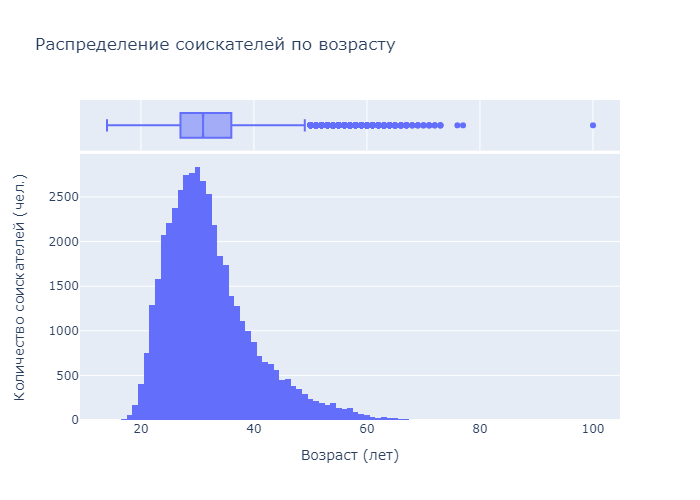

In [33]:
# Строим гистограмму по признаку возраста.
fig = px.histogram(
    hh_data['Возраст'],
    x='Возраст',
    marginal='box',
    title='Распределение соискателей по возрасту',
    )
# Задаем пояснения осей.
fig.update_layout(
    yaxis_title='Количество соискателей (чел.)',
    xaxis_title='Возраст (лет)'
)
# Визуализация.
fig.show('png')

# fig.write_html('Графики\Age_hist.html')

**Выводы:**  
Согласно составленным графикам, модальное значение возраста среди соискателей составляет 30 лет; минимальное и максимальное значения возраста составляют 14 лет и 50 лет соответственно; возраст большинства соискателй вариируется от 27 до 36 лет; однако имеются аномальные значения, начинающиеся от 70 лет и доходящие до 77 лет (единично до 100 лет).

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

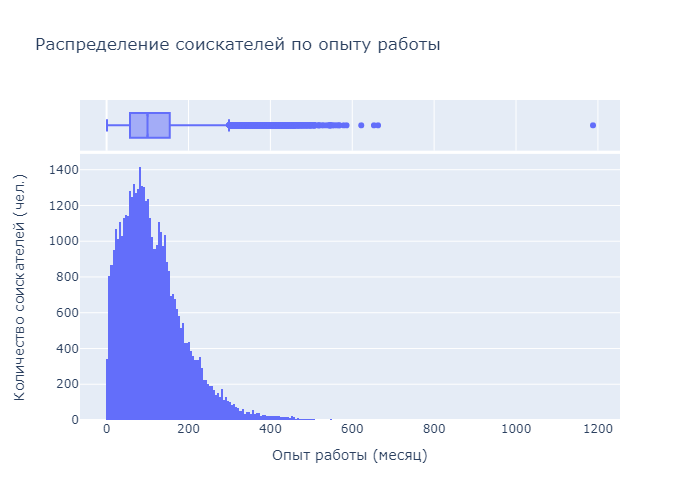

In [34]:
# Строим гистограмму по признаку опыта работы.
fig = px.histogram(
    hh_data['Опыт работы (месяц)'],
    x='Опыт работы (месяц)',
    marginal='box',
    title='Распределение соискателей по опыту работы',
    )
# Задаем наименования осей.
fig.update_layout(
    yaxis_title='Количество соискателей (чел.)'
)
# Визуализация.
fig.show('png')

# fig.write_html('Графики\Exp_hist.html')

**Выводы:**  
Согласно составленным графикам, модальное значение опыта работы среди соискателей составляет 7 лет; минимальное и максимальное значения опыта составляют 1 месяц и 25 лет соответственно; опыт большинства соискателй вариируется от 4,5 до 13 лет; однако имеются аномальные значения, начинающиеся от 48 лет и доходящие до 55 лет (единично до 99 лет).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


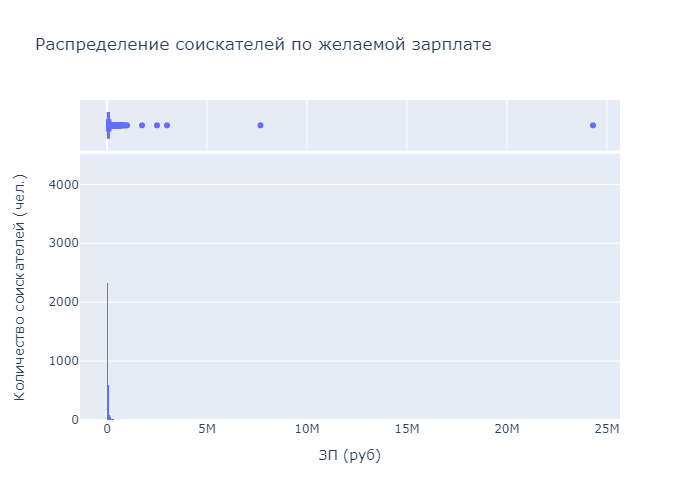

In [35]:
# Строим гистограмму по признаку "ЗП (руб)".
fig = px.histogram(
    hh_data['ЗП (руб)'],
    x='ЗП (руб)',
    marginal='box',
    title='Распределение соискателей по желаемой зарплате',
    )
# Задаем наименования осей.
fig.update_layout(
    yaxis_title='Количество соискателей (чел.)'
)
# Визуализация.
fig.show('png')

# fig.write_html('Графики\Salary_hist.html')

**Выводы:**  
Согласно составленным графикам, модальное значение зарплаты среди соискателей составляет 50-55 тыс руб.; минимальное и максимальное значения зарплаты составляют 1 тыс руб. и 195 тыс руб. соответственно; требования к зарплате большинства соискателй вариируется от 36 тыс руб. до 100 тыс руб.; фиксируются существенные аномальные значения, искажающие модель, начинающиеся от 900 тыс руб. и доходящие до 8,5 млн руб.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

C:\Users\Asus\AppData\Local\Temp\ipykernel_16884\3224187649.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



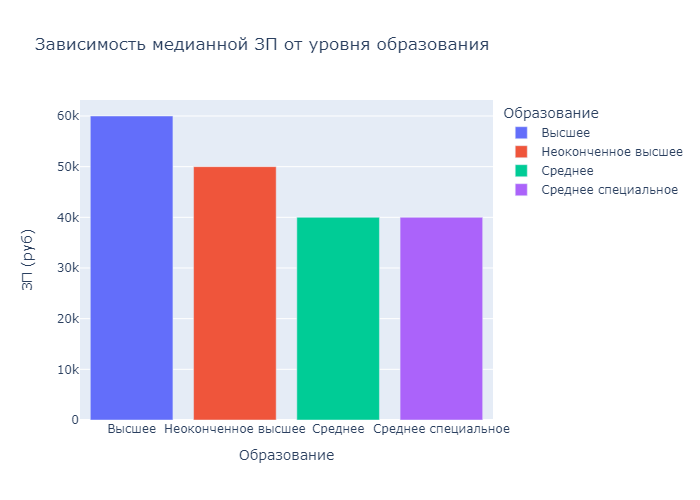

In [36]:
# Задаем входные данные с условиями по уровню ЗП менее 1 млн руб. сгруппировкой по уровню образования.
bar_data = hh_data[hh_data['ЗП (руб)'] < 1000000]
bar_data = hh_data.groupby('Образование', as_index=False)['ЗП (руб)'].median()
# Строим столбчатую диаграмму по медианному значению ЗП.
fig = px.bar(
    bar_data,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    title='Зависимость медианной ЗП от уровня образования'
)
fig.show('png')

# fig.write_html('Графики\Salary_to_Education_bars.html')

**Выводы:**  
Наибольшее медианное значение зарплаты свойственно сосискателям с высшим образованияем, в то время как наименьшие значения наблюдаются у соискателей с средним/средним специальным образованием. Исходя из указанных данных, можно заключить, что уровень образования влияет на прогнозирование зарплаты.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

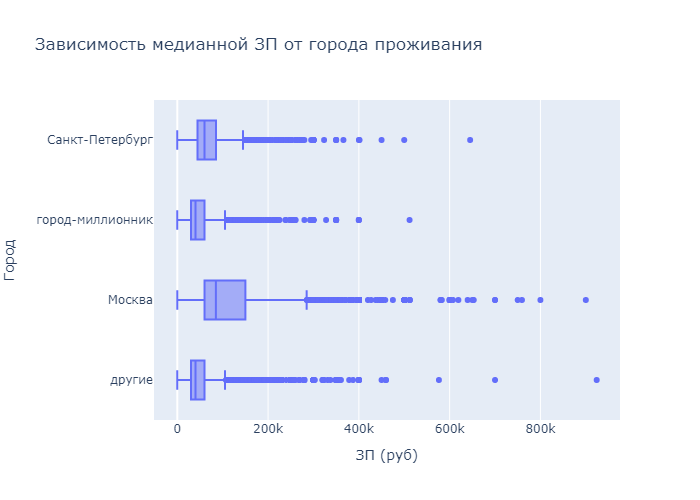

In [37]:
# Задаем входные данные с условиями по уровню ЗП менее 1 млн руб.
box_data = hh_data[hh_data['ЗП (руб)'] < 1000000]
# Строим коробчатую диаграмму по значению ЗП.
fig = px.box(
    box_data,
    x='ЗП (руб)',
    y='Город',
    title='Зависимость медианной ЗП от города проживания'
)
fig.show('png')

# fig.write_html('Графики\Salary_to_City_box.html')

**Выводы:**  
Самое большое медианное значение зарплаты фиксируется в Москве, как и общий размах желаний по зарплате соискателей. Наименьшая медиана Зп фиксируется в городах-миллионниках, как и общий размах желаемой ЗП. Из полученных данных следует, что фактор города играет роль при определении ЗП.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

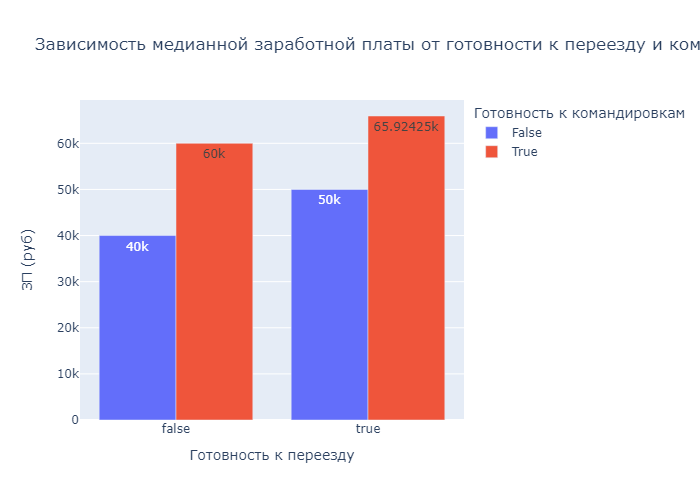

In [38]:
# Производим группировку по необходимым признакам.
bar_data = hh_data.groupby(by=['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()
# Создаем столбчатую диаграмму.
fig = px.bar(
    bar_data,
    x='Готовность к переезду',
    y='ЗП (руб)',
    color='Готовность к командировкам',
    text_auto=True,
    barmode='group',
    title='Зависимость медианной заработной платы от готовности к переезду и командировкам'
)
fig.show('png')

# fig.write_html('Графики\Salary_to_remove_and_bt_bars.html')

**Выводы:**  
Наблюдается тенденция прямой зависимости уровня желаемой зарплаты соискателя от готовности переезда и готовности к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

C:\Users\Asus\AppData\Local\Temp\ipykernel_16884\2576696912.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



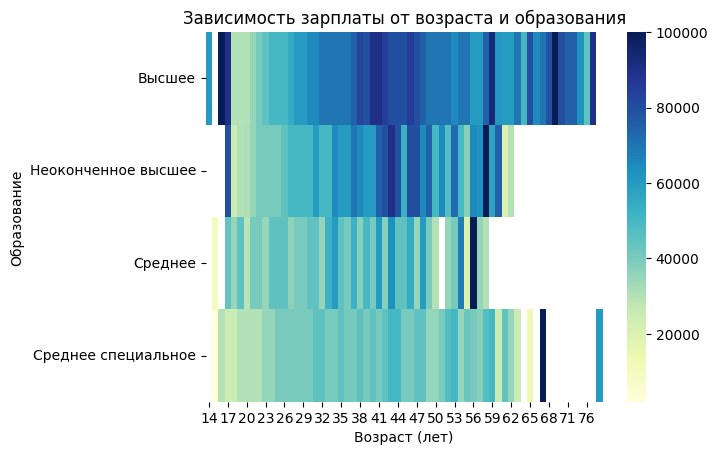

In [39]:
# Сводная таблица зависимости ЗП от возраста и образования.
pivot = pd.pivot_table(
    data=hh_data,
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
)
# Создаем тепловую карту по вышеуказанной таблице.
heatmap_plot = sns.heatmap(pivot, vmax=100000, cmap='YlGnBu')
heatmap_plot.set_xlabel('Возраст (лет)')
heatmap_plot.set_ylabel('Образование')
heatmap_plot.set_title('Зависимость зарплаты от возраста и образования');

**Выводы:**  
Медианное значение зарплаты у соискателей ствновится больше от уровня образования не зависимо от возраста; соискатели с высшим образованием склонны к 30 годам увеличивать свою зарплату; соискатели с высшим образованием готовы работать в предельном возрасте на 10 лет больше чем иные категории образования.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

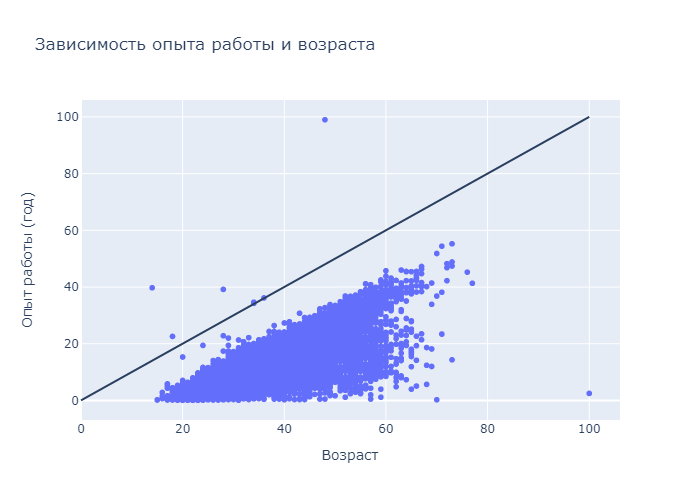

In [40]:
# Создаем новый временный признак опыта работы в годах.
hh_data['Опыт работы (год)'] = hh_data['Опыт работы (месяц)'] / 12
# Строим диаграмму рассеяния по признакам опыта работы в годах и возраста.
fig = px.scatter(hh_data, x='Возраст', y='Опыт работы (год)', title='Зависимость опыта работы и возраста')
# Строим линию отклонений от нормы соотношения возраста и опыта работы.
fig.add_shape(
    type='line',
    x0=0,
    y0=0,
    x1=100,
    y1=100
)
fig.show('png')

# fig.write_html('Графики\Age_to_Exp_scatter.html')

# Удаляем временный признак.
hh_data.drop('Опыт работы (год)', axis=1, inplace=True)

**Выводы:**  
семь соискателей указали недостоверную информацию об опыте работы или возрасте, т.к. их опыт работы либо равен, либо превышает свой возраст.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


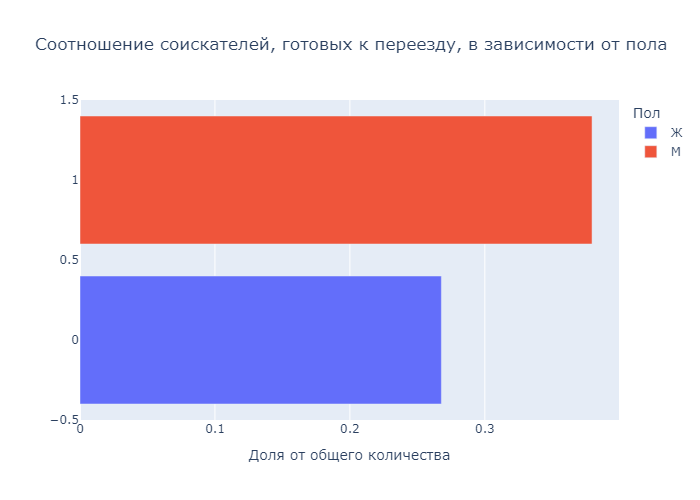

In [41]:
# Задаем группировку данных по полу на признак готовности к переезду.
bar_data = hh_data.groupby(by='Пол', as_index=False)['Готовность к переезду'].mean()
# Строим столбчатую диаграмму.
fig = px.bar(
    bar_data,
    x='Готовность к переезду',
    color='Пол',
    title='Соотношение соискателей, готовых к переезду, в зависимости от пола',
    labels={'index': '', 'Готовность к переезду': 'Доля от общего количества'})
fig.show('png')

# fig.write_html('Графики\Sex_to_Remove_bar.html')

**Выводы:**  
Соискатели из числа мужчин на 10 % охотнее готовы рассматривать вакансии, предполагающие переезд, нежели чем женщины.

In [42]:
# Находим топ 3 самых популярных профессий.
hh_data['Ищет работу на должность:'].value_counts().nlargest(5)

Ищет работу на должность:
Системный администратор    3099
Инженер                     966
Аналитик                    809
Менеджер проектов           745
Руководитель проекта        718
Name: count, dtype: int64

C:\Users\Asus\AppData\Local\Temp\ipykernel_16884\1748646813.py:11: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



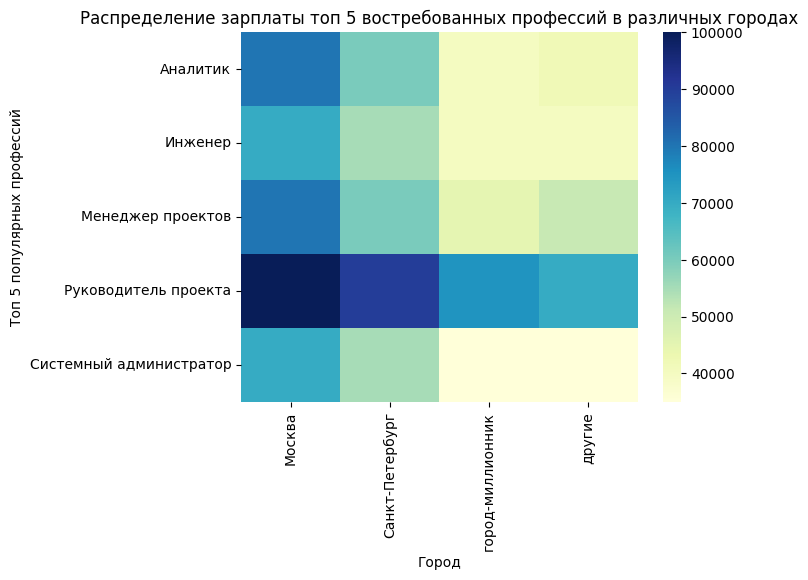

In [51]:
# Фильтруем исходные данные по топ 5 профессиям.
pivot_data = hh_data[
    (hh_data['Ищет работу на должность:']=='Системный администратор')|
    (hh_data['Ищет работу на должность:']=='Инженер')|
    (hh_data['Ищет работу на должность:']=='Аналитик')|
    (hh_data['Ищет работу на должность:']=='Менеджер проектов')|
    (hh_data['Ищет работу на должность:']=='Руководитель проекта')
]

# Сводная таблица зависимости ЗП по топ 5 профессиям в разных городах.
pivot = pd.pivot_table(
    data=pivot_data,
    values='ЗП (руб)',
    index='Ищет работу на должность:',
    columns='Город',
    aggfunc='median',
)
# Создаем тепловую карту по вышеуказанной таблице.
heatmap_plot = sns.heatmap(pivot, vmax=100000, cmap='YlGnBu')
heatmap_plot.set_ylabel('Топ 5 популярных профессий')
heatmap_plot.set_title('Распределение зарплаты топ 5 востребованных профессий в различных городах');

**Выводы:**  
Из топ 5 профессий самой высокооплачиваемой является руководитель проекта в городе Москве; несмотря на то, что профессия системного администратора является самой популярной, она оплачивается ниже всего в топ 5 популярных профессий во всех городах; наблюдается ощая тенденция ранжирования уровня зарплат от большего к меньшему: Москва – Питер – города-миллионники – другие города.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [44]:
# Создаем маску для отлова полных дубликатов строк.
mask = hh_data.duplicated(subset=list(hh_data.columns))
# Узнаем количество полных дублей строк (161).
hh_data[mask].shape[0]
# Удаляем полные дубликаты строк.
hh_data = hh_data.drop_duplicates(subset=list(hh_data.columns))

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [45]:
# Отображаем количество пропусков во всех столбцах, в которых они есть.
hh_data.isnull().sum()[hh_data.isnull().sum()>0].sort_values(ascending=False)

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [46]:
# Заполняем пропуски в признаке "Опыт работы (месяц)" медианным значением.
hh_data = hh_data.fillna({'Опыт работы (месяц)': hh_data['Опыт работы (месяц)'].median()})
# Удаляем строки с пропусками в оставшихся столбцах (место работы и должность).
hh_data.dropna(how='any', axis=0, inplace=True)

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [47]:
# Создаем список индексов строк, в которых зарплата менее 1 тыс руб. или более 1 млн руб.
del_rows = list(hh_data[(hh_data['ЗП (руб)']<1e3)|(hh_data['ЗП (руб)']>1e6)].index)
# Удаляем вышеуказанные строки по заданному списку.
hh_data.drop(del_rows, axis=0, inplace=True)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [48]:
# Создаем список индексов строк, в которых опыт работы соискателя превышает его возраст.
del_rows = list(hh_data[hh_data['Опыт работы (месяц)']/12 > hh_data['Возраст']].index)
# Удаляем вышеуказанные строки по заданному списку.
hh_data.drop(del_rows, axis=0, inplace=True)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

0.4523422276053838

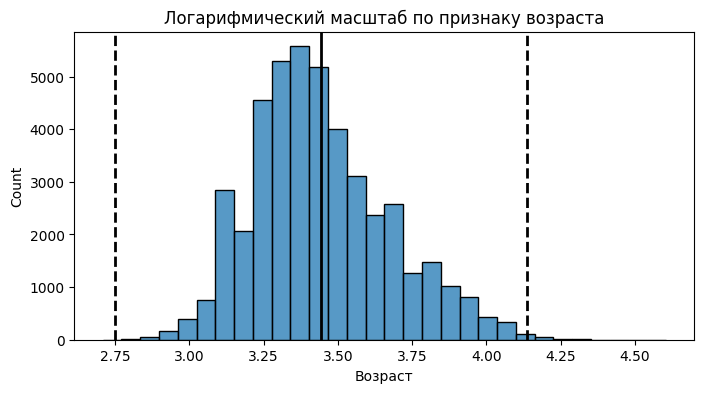

In [49]:
# Создаем графическое изображение метода трех сигм в логарифмическом масштабе по признаку возраста.
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3*log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3*log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Логарифмический масштаб по признаку возраста');
# Определяем сторону асимметрии.
log_age.skew()

**Выводы:**  
наблюдается правосторонняя асимметрия.

In [50]:
# Задаем функцию расчета отклонений по методу сигм.
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

# ПРименяем функцию метода сигм для признака возраста.
outliers, cleaned = outliers_z_score(hh_data, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

display(outliers)

# Создаем список индексов строк как отклонения по методу сигм.
del_rows = list(outliers.index)
# Удаляем вышеуказанные строки.
hh_data.drop(del_rows, axis=0, inplace=True)

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,стажировка,волонтерство,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,True,False,False,False,False,True,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,False,True,True,False,60000.0


**Выводы:**  
соискатели попадают под категрию выбросов в возрасте 15 и 100 лет преимущественно.